RMSE: 1.225993974083803
Accuracy: 93.93%
Loss: 1.50


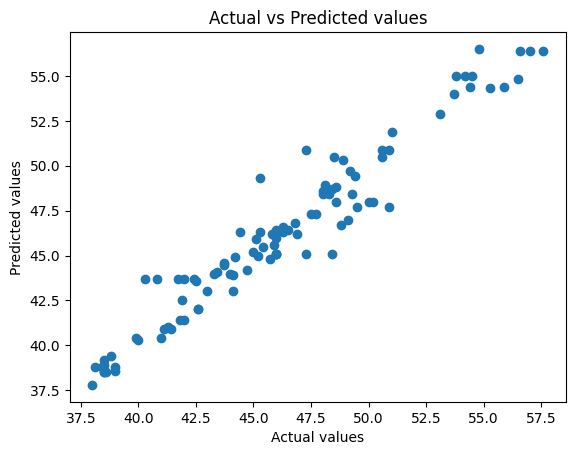

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import partial_dependence
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('BRACBANK.csv')

#drop '#', 'TRADING CODE', 'LTP' columns
df = df.drop(['#', 'TRADING CODE', 'LTP', 'HIGH', 'LOW', 'OPENP', 'YCP', 'TRADE', 'VALUE', 'VOLUME'], axis=1)

# Preprocess the date column
df['DATE'] = pd.to_datetime(df['DATE'])
df['Day'] = df['DATE'].dt.day
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year

# Split the data into features and labels
X = df.drop(['DATE', 'CLOSEP'], axis=1)
y = df['CLOSEP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
regressor = DecisionTreeRegressor(random_state=42)
model = TransformedTargetRegressor(regressor=regressor, transformer=scaler)
model.fit(X_train, y_train) #RUN

# Evaluate the model
y_pred = model.predict(X_test) #result
mse = mean_squared_error(y_test, y_pred) 
rmse = mse ** 0.5
print('RMSE:', rmse)

# Calculate accuracy and loss on the testing set
accuracy = model.score(X_test, y_test) # prediction
loss = mean_squared_error(y_test, y_pred) #learning loss(machine error)

# Print accuracy and loss
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Loss: {:.2f}".format(loss))

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

# Plot partial dependence
partial_dependence(model, X_train, features=[0, 1, 2])
plt.show()


Training accuracy: 0.9957305117441623
Testing accuracy: 0.9959389533437526
[0.        0.9765801 0.0234199 0.       ]
Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


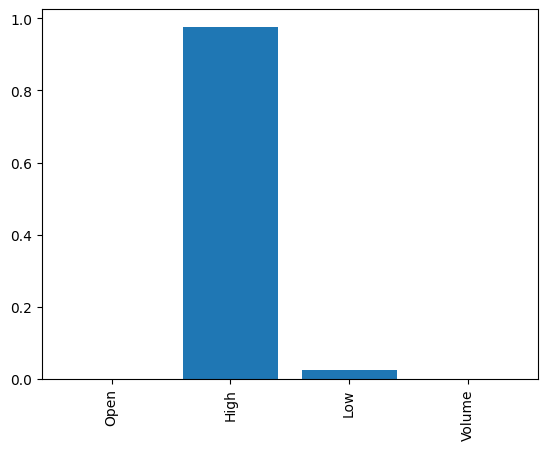

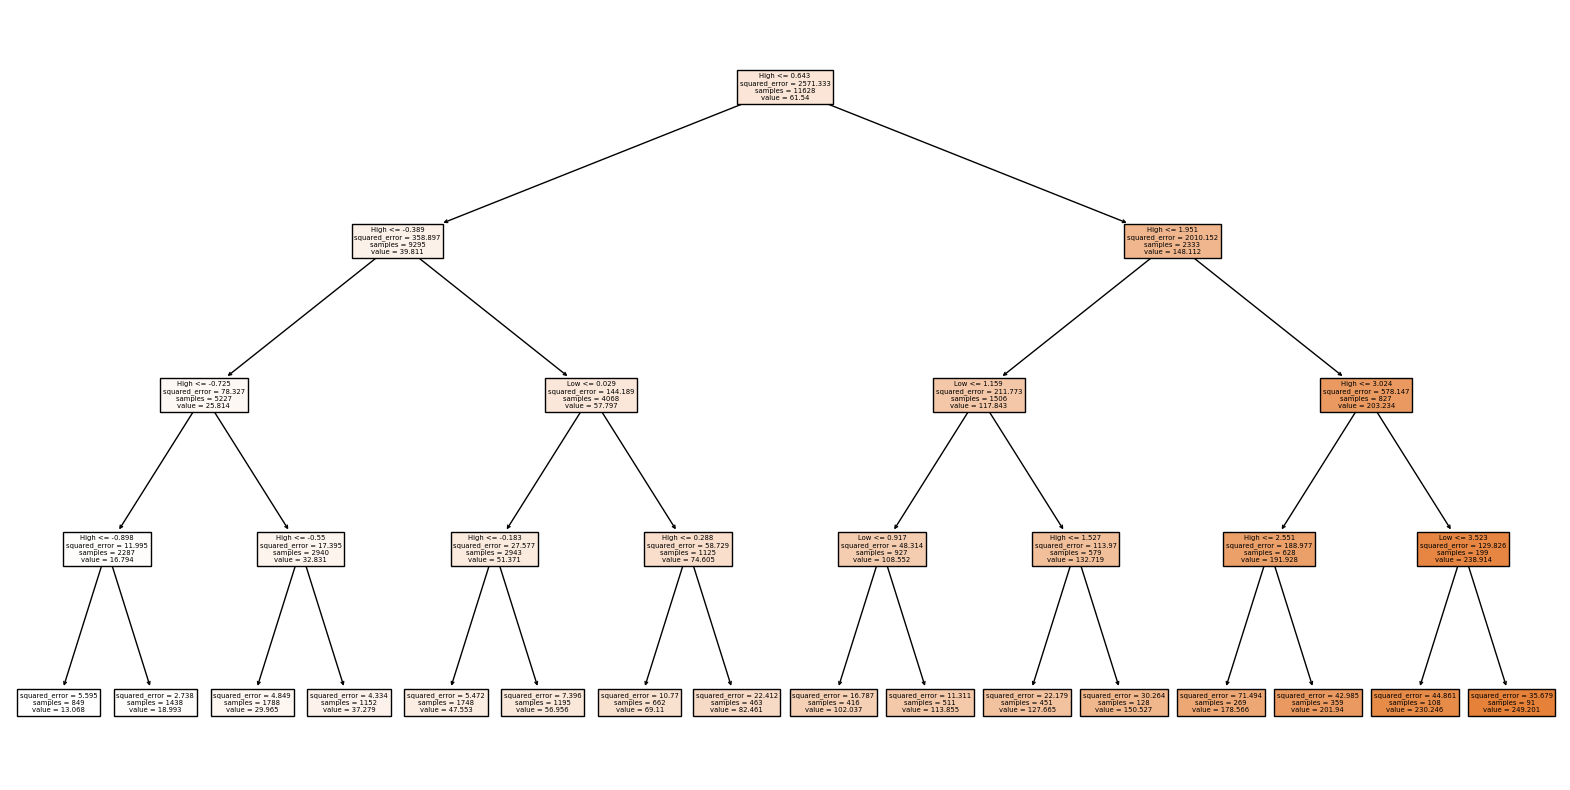

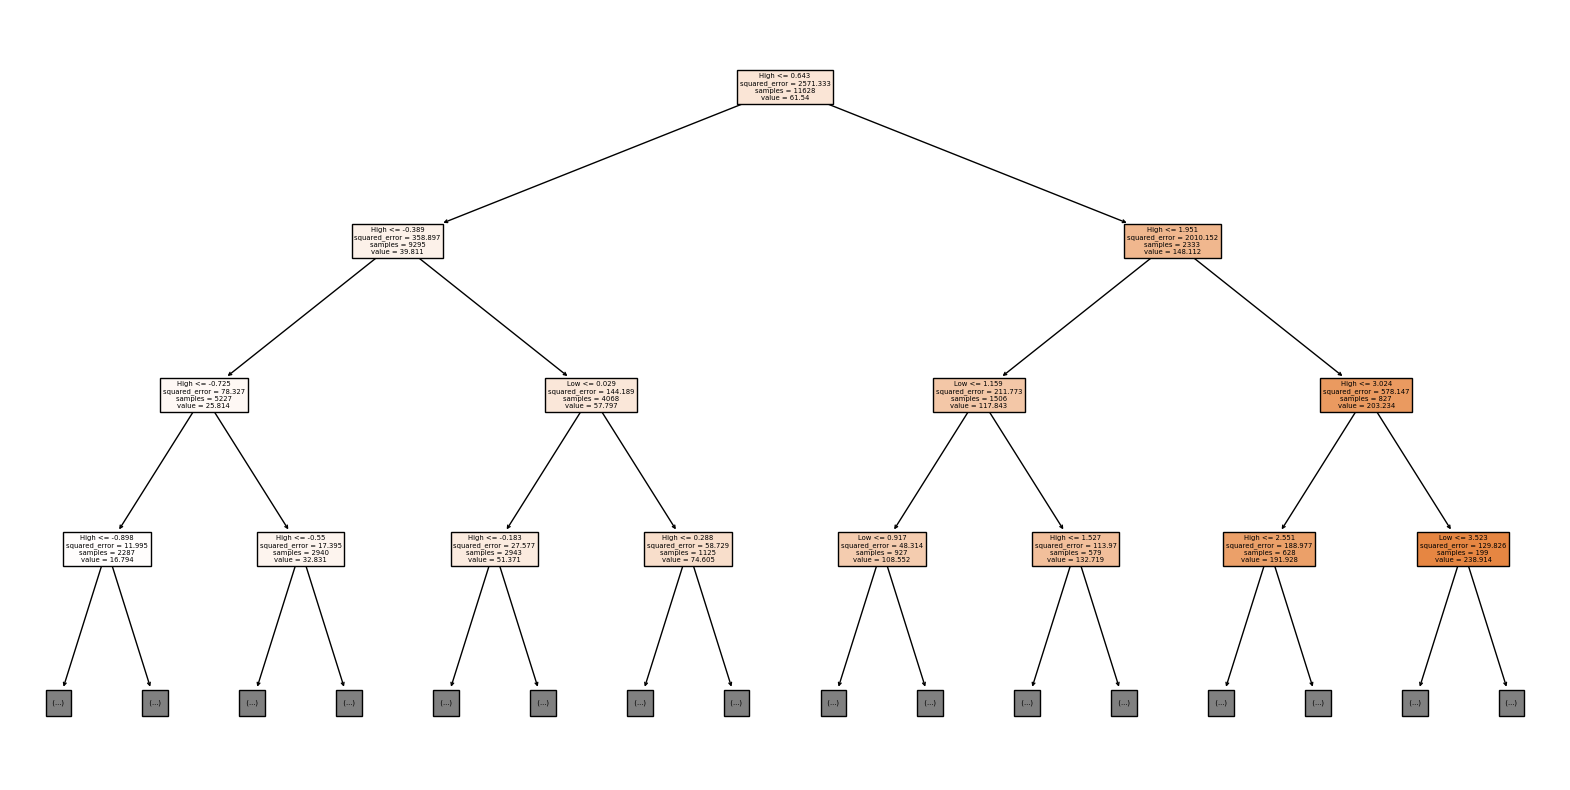

{'average': array([[[[[ 13.06772167,  13.06772167,  13.06772167, ...,
            13.06772167,  13.06772167,  13.06772167],
          [ 13.06772167,  13.06772167,  13.06772167, ...,
            13.06772167,  13.06772167,  13.06772167],
          [ 13.06772167,  13.06772167,  13.06772167, ...,
            13.06772167,  13.06772167,  13.06772167],
          ...,
          [ 13.06772167,  13.06772167,  13.06772167, ...,
            13.06772167,  13.06772167,  13.06772167],
          [ 13.06772167,  13.06772167,  13.06772167, ...,
            13.06772167,  13.06772167,  13.06772167],
          [ 13.06772167,  13.06772167,  13.06772167, ...,
            13.06772167,  13.06772167,  13.06772167]],

         [[ 18.99341391,  18.99341391,  18.99341391, ...,
            18.99341391,  18.99341391,  18.99341391],
          [ 18.99341391,  18.99341391,  18.99341391, ...,
            18.99341391,  18.99341391,  18.99341391],
          [ 18.99341391,  18.99341391,  18.99341391, ...,
            18.99

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import partial_dependence

# Load the dataset
df = pd.read_csv('DATASET14k.csv')

# Check for missing values
#print(df.isnull().sum())

# Replace missing values with the mean of the corresponding column
#df = df.fillna(df.mean())

# Drop unnecessary columns
df = df.drop(['OpenInt'], axis=1)

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset by date
df = df.sort_values(by='Date')

# Extract the features
X = df[['Open', 'High', 'Low', 'Volume']]

# Extract the labels
y = df['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a decision tree regressor model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train_scaled, y_train)

# Calculate the training and testing accuracy
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

# Plot partial dependenced

partial_dependence(model, X_train_scaled, features=[0, 1, 2, 3])
plt.show()


# Print the feature importances
print(model.feature_importances_)
print(X.columns)

# Plot the feature importances
plt.bar(X.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

# Plot the tree with max_depth=3
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, max_depth=3)
plt.show()

#Print the partial dependence values
print(partial_dependence(model, X_train_scaled, features=[0, 1, 2, 3]))
